# Decision Trees 🌲🌳🌴

After this session you will 
- be able to do the same as in the NB on LogReg, only with regards to Decision Trees 😉

Note:
- In general, there is a Classification Tree-model and one for Regression in sklearn => we will only talk about the classification model.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
plt.rcParams['figure.figsize'] = (12, 6)

### 1. Load the data

In [23]:
df = pd.read_csv('/content/penguins_simple.csv', sep=';')
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


### 2. Train-test-split

In [33]:
X = df[["Culmen Length (mm)", "Body Mass (g)"]] #look into the dataframe and create a new df out of the two columns
y = df["Species"]                               # just take out of the df one column and create a series

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((249, 2), (84, 2), (249,), (84,))

### 3. Plot the data

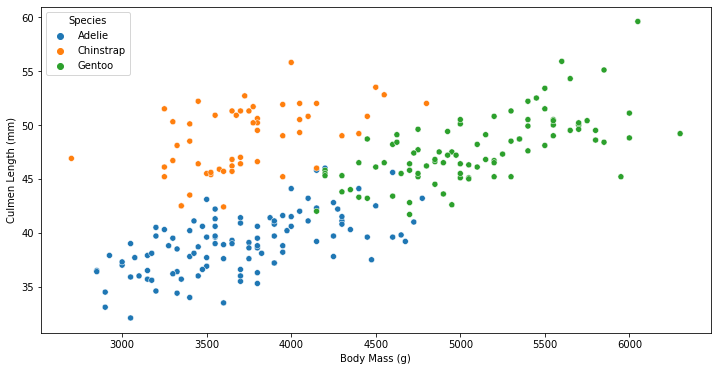

In [42]:
sns.scatterplot(data=X_train, x = X_train["Body Mass (g)"], y = X_train["Culmen Length (mm)"], hue = y, legend=True)
#

## Decision Tree from Scratch

In [18]:
predictions = []

for idx, rows in X_train.iterrows():
  if rows['Culmen Length (mm)']<45:
    predictions.append('Adelie')
  else:
    if rows["Body Mass (g)"]>4500:
      predictions.append('Gentoo')
    else:
      predictions.append('Chinstrap')

In [21]:
predictions[0:10]

['Gentoo',
 'Adelie',
 'Adelie',
 'Gentoo',
 'Chinstrap',
 'Chinstrap',
 'Gentoo',
 'Gentoo',
 'Adelie',
 'Adelie']

In [ ]:
sklearn.

## ... but is there a better way than guessing?

Yes! It's called **Gini-Impurity!**   
It can be used to measure how good our split is -> how "pure" the resulting nodes are.

## Gini Impurity

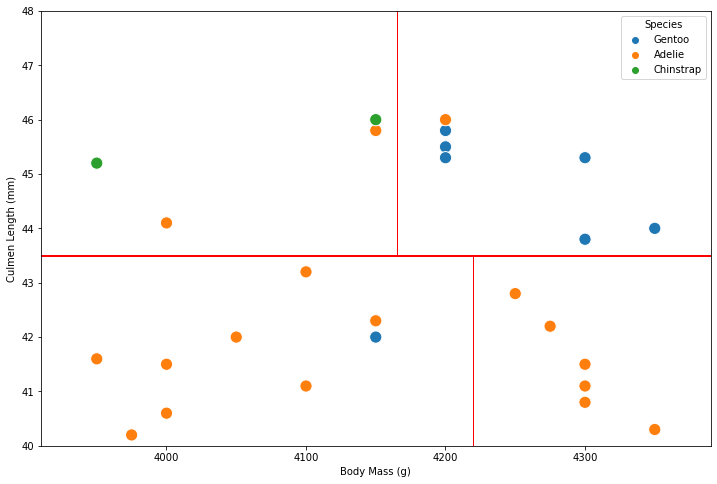

In [ ]:
plt.figure(figsize=(12,8))
plot = sns.scatterplot(x=X_train["Body Mass (g)"], y=X_train["Culmen Length (mm)"], hue=y_train, s=150)
plt.axis((3910, 4390, 40, 48))
plt.plot([3910, 4390],[43.5,43.5], linewidth=2, color="red") #horizontal
plt.plot([4220, 4220],[0,43.5], linewidth=1, color="red") #bottom
plt.plot([4165, 4165],[43.5,48], linewidth=1, color="red") #top

GINI =  $\sum\nolimits_{k=1}^K$(p_{k})$(1 - p_{k})$

K = classes, 
p = Proportion of points belonging to class k

Let's denote the classes this way:
- "1" = "Adelie"
- "2" = "Gentoo"
- "3" = "Chinstrap"

In [43]:
# lower left corner:
p1=(8/9)
p2=(1/9)

gini_lower_left = p1*(1-p1) + p2*(1-p2)
gini_lower_left

0.1975308641975309

In [45]:
# lower right corner:
p1=(6/6)
p2=0
#p3=0


gini_lower_right = p1*(1-p1) + p2*(1-p2)
gini_lower_right

0

In [47]:
# upper left corner:
p1=(2/4)
p2=0
p3=(2/4)

gini_upper_left = p1*(1-p1) + p3*(1-p3)
gini_upper_left

0.5

In [48]:
# upper right corner:
p1=(1/7)
p2=0
p3=(6/7)

gini_upper_right = p1*(1-p1) + p2*(1-p2)
gini_upper_right

0.12244897959183673

In [49]:
# Evaluation of the split vertical bottom: does this split create two "good" nodes? 
gini_lower_left * (9/15)  + gini_lower_right * (6/15)

0.11851851851851854

In summary: finding the best thresholds ("splitting the data") will require to define them such that Gini is minimized.

## Luckily, there is a Decision Tree Model in Sklearn that will do all the hard work for us!

#### Train the model

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [70]:
m = DecisionTreeClassifier(max_depth=3)   

In [71]:
m.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### Make predictions

In [72]:
ypred = m.predict(X_train)

In [73]:
ypred[0:5]

array(['Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo'], dtype=object)

In [74]:
m.score(X_train, y_train)

0.9317269076305221

#### Plot the tree

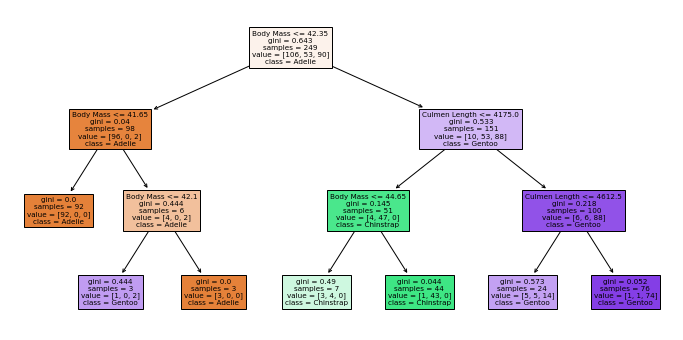

In [75]:
t = plot_tree(m, feature_names=["Body Mass", "Culmen Length"],  class_names=["Adelie", "Chinstrap", "Gentoo"], filled=True)

## The Decision Tree Algorithm
`split(node, {samples})`:

1. Determines the best feature for splitting the data*
2. Determines the best value / threshold for splitting*
    - Entropy (Computer Science) - ID3 Algorithm
    - Gini Impurity (Economics) - CART Algorithm
3. Create 2 children nodes (binary)
4. Split the {samples} across those nodes
5. Recurse! For each children node,
    - IF subset is PURE:
        - STOP!
    - ELSE:
        - `split(child_node, {subset})`

## Entropy

4 samples --> 4, 0 (100% Purity) -> Entropy = 0.0

4 samples --> 2, 2 (100% Impurity) -> Entropy = 1.0 (Maximum for binary classification)

In [80]:
m = DecisionTreeClassifier(max_depth=2, criterion='entropy')  
m.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

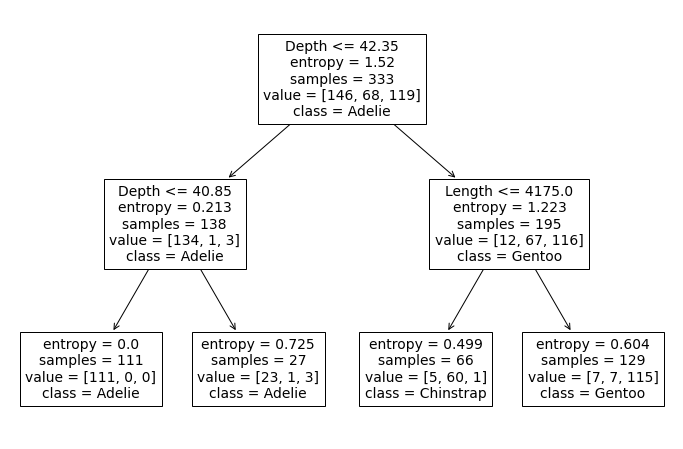

In [81]:
plt.figure(figsize=(12, 8))
t = plot_tree(m, feature_names=['Depth', 'Length'], class_names=['Adelie', 'Chinstrap', 'Gentoo'])

**Starting Entropy (at the root node)**

In [82]:
P_Adelie = (146) / (146+68+119)
P_Chin = (68) / (146+68+119)
P_Gent = (119) / (146+68+119)

entropy_root_node = -P_Adelie * np.log2(P_Adelie) - P_Chin * np.log2(P_Chin) - P_Gent * np.log2(P_Gent)
entropy_root_node

1.5200835543530913

**Entropy after the first question / split**

In [85]:
P_Adelie = (134)/(134+1+3)
P_Chin = (1)/(134+1+3)
P_Gent = (3)/(134+1+3)

entropy_split_1a = -P_Adelie * np.log2(P_Adelie) - P_Chin * np.log2(P_Chin) - P_Gent * np.log2(P_Gent)
entropy_split_1a

0.21279373921653882

In [86]:

P_Adelie = (12)/(12+67+116)
P_Chin = (67)/(12+67+116)
P_Gent = (116)/(12+67+116)

entropy_split_1b = -P_Adelie * np.log2(P_Adelie) - P_Chin * np.log2(P_Chin) - P_Gent * np.log2(P_Gent)
entropy_split_1b

1.2228517434720567

**Then, to calculate the INFORMATION GAIN of the first question, you take the weighted sum of the resulting entropies, and subtract that from the original starting entropy:**

In [87]:
Gain = entropy_root_node - (134+1+3)/(146+68+120)*entropy_split_1a - (12+67+117)/(146+68+120)*entropy_split_1b
Gain

0.7145611659327157


The Difference in entropy before the split and the entropy after the split is called `information gain`. We can think of this as the drop in entropy (which is what we want, b/c entropy basically means uncertainty), or the increase in information.

And the reason the first question was chosen (i.e. "is the Culmen shorter than 42.35 millimeters?") is **because that was the question that resulted in the largest information gain (0.71) compared to all other possible questions**. The algorithm keeps going as long as it can find questions that increase the information gain.

## When should I use a Decision tree? 🌳   

**Advantages:** 
- intuitive understanding, can be visualized
- requires little data preparation

**Disadvantages:**
- prone to overfitting  